### Analytics Vidya Job-A-Thon Problem

#### Import Neccesary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
pd.set_option('display.max_columns', None)
%matplotlib inline

In [3]:
train_df ['Source'] = 'train'

test_df ['Source'] = 'test'

In [4]:
train_df

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Source
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0,train
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0,train
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1,train
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0,train
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0,train
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0,train
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0,train
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1,train


In [5]:
df = pd.concat([train_df, test_df], axis = 0)

#### EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72687 entries, 0 to 21804
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       72687 non-null  int64  
 1   City_Code                72687 non-null  object 
 2   Region_Code              72687 non-null  int64  
 3   Accomodation_Type        72687 non-null  object 
 4   Reco_Insurance_Type      72687 non-null  object 
 5   Upper_Age                72687 non-null  int64  
 6   Lower_Age                72687 non-null  int64  
 7   Is_Spouse                72687 non-null  object 
 8   Health Indicator         55969 non-null  object 
 9   Holding_Policy_Duration  43833 non-null  object 
 10  Holding_Policy_Type      43833 non-null  float64
 11  Reco_Policy_Cat          72687 non-null  int64  
 12  Reco_Policy_Premium      72687 non-null  float64
 13  Response                 50882 non-null  float64
 14  Source                

In [7]:
df.isna().mean()

ID                         0.000000
City_Code                  0.000000
Region_Code                0.000000
Accomodation_Type          0.000000
Reco_Insurance_Type        0.000000
Upper_Age                  0.000000
Lower_Age                  0.000000
Is_Spouse                  0.000000
Health Indicator           0.230000
Holding_Policy_Duration    0.396962
Holding_Policy_Type        0.396962
Reco_Policy_Cat            0.000000
Reco_Policy_Premium        0.000000
Response                   0.299985
Source                     0.000000
dtype: float64

<AxesSubplot:xlabel='City_Code', ylabel='count'>

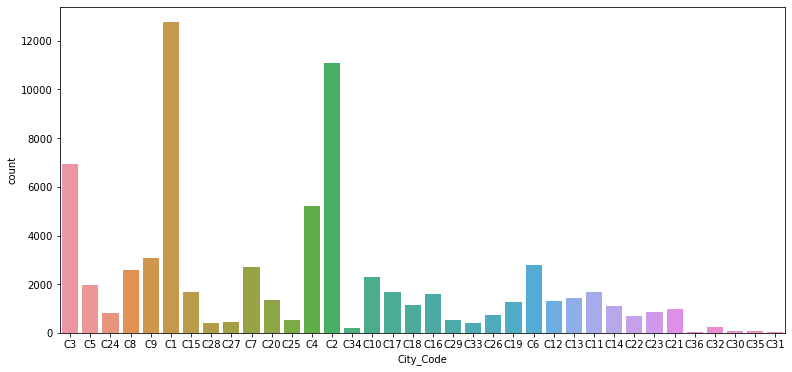

In [8]:
plt.figure(figsize=(13,6))
sns.countplot(x = df['City_Code'])


In [9]:
df.City_Code.value_counts()

C1     12762
C2     11078
C3      6954
C4      5230
C9      3089
C6      2769
C7      2698
C8      2579
C10     2291
C5      1963
C17     1689
C15     1663
C11     1661
C16     1613
C13     1429
C20     1370
C12     1310
C19     1264
C18     1131
C14     1089
C21      984
C23      842
C24      823
C26      731
C22      713
C25      536
C29      533
C27      437
C28      394
C33      392
C32      240
C34      189
C35       89
C30       81
C36       54
C31       17
Name: City_Code, dtype: int64

In [10]:
df.Region_Code.value_counts()

1       140
2       112
5       105
4       102
6       102
       ... 
5707      1
6063      1
6127      1
6189      1
5853      1
Name: Region_Code, Length: 5538, dtype: int64

<AxesSubplot:xlabel='Accomodation_Type', ylabel='count'>

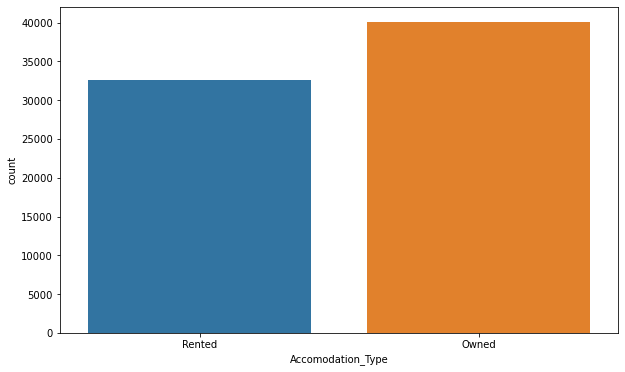

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['Accomodation_Type'])
#Categorical

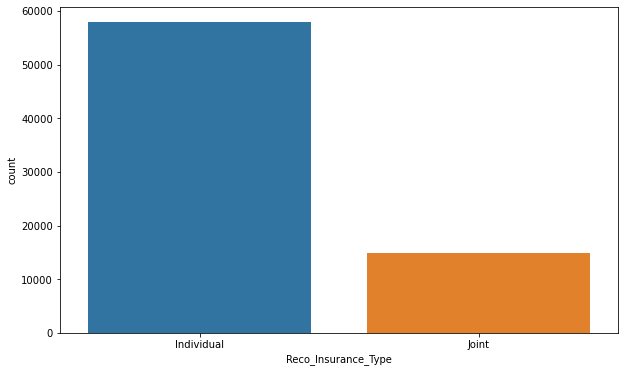

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['Reco_Insurance_Type']);
#Categorical

<AxesSubplot:xlabel='Lower_Age', ylabel='Count'>

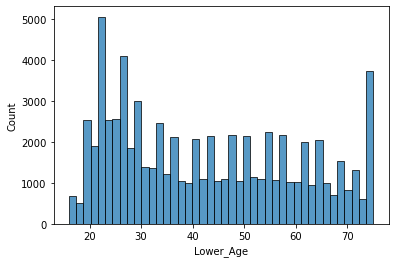

In [13]:
sns.histplot(x = df['Lower_Age'])

<AxesSubplot:xlabel='Lower_Age', ylabel='Count'>

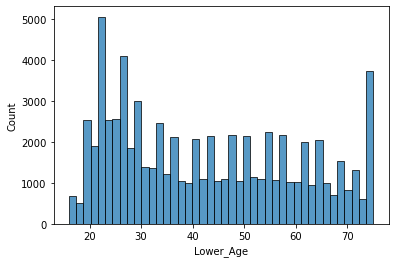

In [14]:
sns.histplot(x = df['Lower_Age'])

In [15]:
train_df[train_df['Reco_Insurance_Type'] == 'Joint']

#Joint insurance type has different Upper and Lower age 

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Source
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0,train
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0,train
7,8,C1,3175,Owned,Joint,75,73,Yes,X4,9.0,4.0,17,29344.0,1,train
8,9,C15,3497,Owned,Joint,52,43,No,X1,14.0,3.0,1,27283.2,0,train
9,10,C1,530,Owned,Joint,59,26,Yes,NaN,7.0,4.0,18,21100.8,1,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50834,50835,C2,204,Owned,Joint,75,64,Yes,X1,1.0,1.0,3,33796.0,0,train
50850,50851,C2,237,Owned,Joint,66,26,No,X1,NaN,NaN,22,30273.6,0,train
50855,50856,C1,1399,Owned,Joint,70,58,Yes,X1,2.0,1.0,19,25746.0,0,train
50858,50859,C1,494,Rented,Joint,62,29,Yes,X1,13.0,3.0,18,24323.2,1,train


<AxesSubplot:xlabel='Is_Spouse', ylabel='count'>

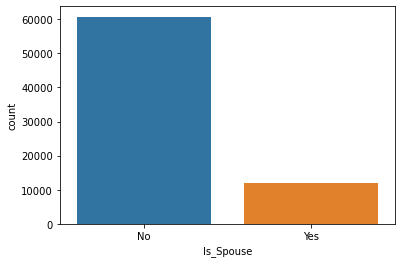

In [16]:
sns.countplot(x = df['Is_Spouse'])
#most of them has no spouse

In [17]:
df['Health Indicator'].nunique()

9

<AxesSubplot:xlabel='Health Indicator', ylabel='count'>

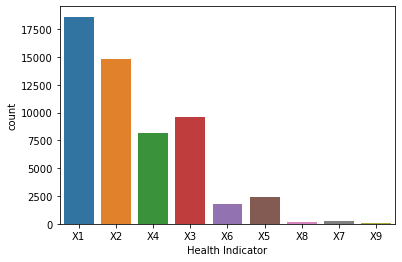

In [18]:
sns.countplot(x = df['Health Indicator'])

In [19]:
df['Health Indicator'].isna().sum()

16718

In [20]:
df.groupby('City_Code')['Health Indicator'].value_counts()['C9']

Health Indicator
X1    794
X2    634
X4    390
X3    388
X5     91
X6     67
X7     10
X8     10
X9      8
Name: Health Indicator, dtype: int64

In [21]:
df['Holding_Policy_Duration'].isna().sum()

28854

In [22]:
df.groupby('City_Code')['Holding_Policy_Duration'].value_counts()['C1']

Holding_Policy_Duration
14+     1555
3.0      820
2.0      768
4.0      689
1.0      668
5.0      633
6.0      630
7.0      527
8.0      419
9.0      403
10.0     349
11.0     192
12.0     180
13.0     178
14.0     166
Name: Holding_Policy_Duration, dtype: int64

In [23]:
df['Holding_Policy_Type'].isna().sum()

28854

In [24]:
df.groupby('City_Code')['Holding_Policy_Type'].value_counts()['C1']

Holding_Policy_Type
3.0    3457
1.0    2248
4.0    1452
2.0    1020
Name: Holding_Policy_Type, dtype: int64

In [25]:
df['Reco_Policy_Cat']

0        22
1        22
2        19
3        19
4        16
         ..
21800    18
21801    18
21802     1
21803    19
21804     3
Name: Reco_Policy_Cat, Length: 72687, dtype: int64

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Reco_Policy_Premium', ylabel='Density'>

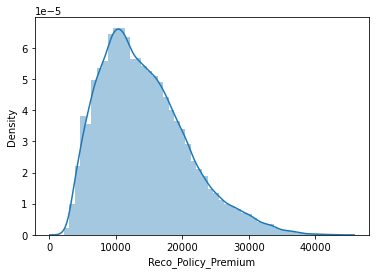

In [26]:
sns.distplot(df['Reco_Policy_Premium'])

In [27]:
df['Reco_Policy_Premium'].nunique()

7685

#### Feature Engineering

In [28]:
df

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Source
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0.0,train
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0.0,train
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1.0,train
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0.0,train
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,C3,1044,Owned,Individual,45,45,No,X1,4.0,1.0,18,15884.0,NaN,test
21801,72684,C4,266,Owned,Individual,59,59,No,X5,6.0,3.0,18,21390.0,NaN,test
21802,72685,C12,2470,Owned,Individual,74,74,No,X3,NaN,NaN,1,17836.0,NaN,test
21803,72686,C10,1676,Rented,Individual,25,25,No,X4,3.0,1.0,19,11568.0,NaN,test


In [29]:
df['Age'] = df['Upper_Age'] - df ['Lower_Age']
#Can replace both the column with these

In [30]:
#filling na values with mode
df['Health Indicator'].fillna(df['Health Indicator'].mode()[0], inplace = True)

In [31]:
df.loc[df['Holding_Policy_Type']==4.0][['Holding_Policy_Duration', 'Holding_Policy_Type']].mode()

,Holding_Policy_Duration,Holding_Policy_Type
0,14+,4.0


In [32]:
df[df['Holding_Policy_Type'].isna()]

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Source,Age
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0.0,train,53
6,7,C3,679,Owned,Individual,28,28,No,X1,NaN,NaN,17,10640.0,0.0,train,0
10,11,C28,600,Owned,Individual,21,21,No,X2,NaN,NaN,21,4068.0,1.0,train,0
13,14,C5,900,Rented,Individual,20,20,No,X2,NaN,NaN,18,8364.0,0.0,train,0
15,16,C3,1484,Rented,Individual,20,20,No,X3,NaN,NaN,2,4912.0,0.0,train,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21790,72673,C1,458,Owned,Individual,35,35,No,X5,NaN,NaN,17,11648.0,NaN,test,0
21791,72674,C6,1067,Rented,Individual,30,30,No,X4,NaN,NaN,17,11088.0,NaN,test,0
21793,72676,C7,685,Owned,Individual,26,26,No,X1,NaN,NaN,14,10026.0,NaN,test,0
21798,72681,C1,340,Owned,Individual,24,24,No,X1,NaN,NaN,19,6600.0,NaN,test,0


In [33]:
df[df['Holding_Policy_Type'].notna()]

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Source,Age
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0.0,train,0
2,3,C5,3732,Owned,Individual,32,32,No,X1,1.0,1.0,19,7450.0,1.0,train,0
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0.0,train,4
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0.0,train,0
5,6,C9,1785,Rented,Individual,52,52,No,X2,5.0,1.0,22,15264.0,1.0,train,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21799,72682,C9,944,Owned,Joint,57,21,No,X1,6.0,3.0,4,27846.0,NaN,test,36
21800,72683,C3,1044,Owned,Individual,45,45,No,X1,4.0,1.0,18,15884.0,NaN,test,0
21801,72684,C4,266,Owned,Individual,59,59,No,X5,6.0,3.0,18,21390.0,NaN,test,0
21803,72686,C10,1676,Rented,Individual,25,25,No,X4,3.0,1.0,19,11568.0,NaN,test,0


In [34]:
groupped = df.groupby(['City_Code','Health Indicator'])['Holding_Policy_Duration'].value_counts()

In [35]:
df.groupby(['City_Code','Health Indicator'])['Holding_Policy_Type'].value_counts()['C3','X1'].index[0]

3.0

In [36]:
df

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Source,Age
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0.0,train,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0.0,train,53
2,3,C5,3732,Owned,Individual,32,32,No,X1,1.0,1.0,19,7450.0,1.0,train,0
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0.0,train,4
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0.0,train,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,C3,1044,Owned,Individual,45,45,No,X1,4.0,1.0,18,15884.0,NaN,test,0
21801,72684,C4,266,Owned,Individual,59,59,No,X5,6.0,3.0,18,21390.0,NaN,test,0
21802,72685,C12,2470,Owned,Individual,74,74,No,X3,NaN,NaN,1,17836.0,NaN,test,0
21803,72686,C10,1676,Rented,Individual,25,25,No,X4,3.0,1.0,19,11568.0,NaN,test,0


In [37]:
df[df['Holding_Policy_Type'].isna()]['Holding_Policy_Duration'].index

Int64Index([    1,     6,    10,    13,    15,    17,    19,    21,    22,
               23,
            ...
            21775, 21779, 21783, 21786, 21788, 21790, 21791, 21793, 21798,
            21802],
           dtype='int64', length=28854)

In [38]:
key = list(df.iloc[6][['City_Code','Health Indicator']].values)

In [39]:
key

['C3', 'X1']

In [40]:
key[0]

'C3'

In [81]:
def impute_nan(col):
    groupped = df.groupby(['City_Code','Health Indicator'])[col].value_counts()
    index_null = df[df[col].isna()][col].index
    hi = df[col]
    for i in index_null:
        print(i)
        key = list(df.iloc[i][['City_Code','Health Indicator']].values)
        try:
            val = groupped[key[0]][key[1]].index[0]
            hi.iloc[i] = val
        except :
            pass
        
    

In [82]:
impute_nan('Holding_Policy_Type')

455
457
458
459
462
466
470
473
474
479
480
481
484
486
489
492
494
495
496
497
498
503
504
511
512
514
517
518
519
522
525
528
529
530
531
532
533
536
540
543
545
547
549
553
554
555
556
558
560
563
564
565
566
567
568
570
574

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)



577
578
580
583
585
595
596
604
607
608
609
612
614
615
619
620
622
624
628
630
631
634
636
638
640
649
659
661
663
666
670
671
673
674
676
677
681
684
685
692
694
695
696
698
699
700
701
705
712
713
714
715
719
721
735
736
738
741
745
749
750
754
755
757
762
764
766
767
769
775
777
778
780
785
786
787
791
793
796
797
801
803
808
809
811
816
820
821
822
826
828
830
844
850
851
852
853
858
864
865
866
867
870
872
876
878
880
886
889
891
893
895
896
898
904
909
910
912
916
918
922
924
925
926
927
932
935
937
942
943
945
947
948
949
953
954
955
956
959
960
962
964
966
971
974
975
976
977
978
979
980
982
983
984
985
988
989
991
994
995
997
1000
1002
1004
1006
1008
1014
1016
1017
1020
1021
1023
1024
1026
1032
1036
1041
1043
1045
1053
1054
1058
1060
1062
1063
1066
1067
1073
1077
1081
1084
1086
1087
1088
1091
1095
1098
1099
1100
1105
1106
1108
1111
1112
1115
1116
1117
1118
1120
1122
1124
1125
1126
1128
1130
1132
1133
1134
1135
1138
1144
1152
1153
1154
1155
1160
1164
1165
1167
1169
1172
1173


4894
4896
4897
4903
4904
4911
4913
4916
4919
4921
4924
4927
4928
4929
4931
4934
4936
4938
4939
4944
4947
4948
4950
4951
4953
4955
4960
4962
4963
4969
4970
4974
4975
4976
4980
4984
4989
4990
4993
4995
4998
5002
5008
5009
5013
5014
5015
5017
5018
5019
5021
5023
5026
5028
5031
5032
5034
5036
5040
5041
5050
5055
5060
5061
5063
5065
5067
5071
5074
5075
5077
5079
5081
5082
5083
5090
5091
5092
5093
5098
5101
5105
5107
5108
5109
5110
5111
5112
5114
5116
5120
5123
5124
5125
5126
5127
5128
5129
5130
5136
5137
5138
5144
5145
5148
5150
5151
5153
5155
5158
5160
5161
5162
5165
5170
5171
5175
5178
5179
5181
5182
5184
5185
5191
5192
5194
5202
5203
5204
5205
5206
5207
5211
5213
5215
5217
5218
5220
5225
5240
5242
5244
5245
5247
5249
5250
5252
5254
5255
5256
5257
5260
5261
5264
5265
5266
5268
5272
5273
5274
5280
5284
5287
5289
5291
5292
5295
5297
5298
5299
5306
5308
5314
5315
5318
5321
5323
5334
5335
5338
5339
5340
5343
5345
5347
5349
5351
5355
5358
5360
5361
5363
5368
5369
5371
5373
5375
5377
5379
5380


9127
9129
9131
9133
9134
9135
9137
9140
9147
9151
9152
9154
9156
9159
9163
9164
9167
9174
9176
9179
9180
9181
9182
9183
9194
9196
9200
9207
9209
9210
9214
9215
9216
9219
9221
9223
9225
9226
9230
9232
9233
9234
9237
9245
9246
9249
9253
9255
9256
9257
9258
9260
9262
9263
9266
9268
9269
9270
9272
9274
9282
9283
9285
9289
9290
9291
9292
9296
9301
9305
9307
9314
9321
9322
9325
9328
9329
9332
9334
9338
9343
9346
9348
9350
9351
9352
9353
9355
9356
9358
9360
9361
9364
9367
9370
9374
9376
9378
9379
9384
9386
9387
9394
9399
9400
9404
9405
9406
9413
9420
9428
9429
9430
9435
9437
9441
9444
9448
9449
9452
9454
9456
9457
9460
9464
9465
9466
9469
9470
9474
9482
9484
9485
9486
9493
9497
9502
9504
9505
9506
9507
9508
9509
9510
9511
9513
9514
9515
9516
9517
9518
9520
9522
9525
9526
9527
9531
9532
9533
9537
9541
9549
9551
9553
9554
9555
9556
9557
9559
9560
9565
9566
9568
9569
9570
9571
9576
9579
9580
9583
9585
9588
9591
9592
9593
9597
9598
9600
9602
9605
9607
9608
9609
9615
9619
9620
9621
9622
9632
9634


12804
12806
12809
12814
12816
12818
12822
12825
12826
12827
12829
12836
12842
12843
12853
12855
12858
12862
12863
12865
12866
12867
12870
12872
12875
12876
12879
12880
12884
12891
12893
12904
12906
12907
12909
12910
12912
12915
12921
12925
12927
12928
12930
12932
12933
12934
12936
12937
12939
12940
12945
12947
12949
12951
12956
12957
12958
12959
12962
12966
12967
12968
12970
12972
12975
12977
12979
12980
12983
12987
12993
12995
12996
12998
12999
13001
13004
13012
13017
13018
13023
13024
13025
13026
13029
13030
13033
13035
13036
13038
13044
13047
13048
13049
13050
13051
13056
13057
13058
13062
13063
13068
13070
13076
13078
13080
13082
13083
13086
13089
13092
13094
13097
13098
13100
13103
13105
13106
13109
13110
13112
13114
13115
13116
13130
13131
13132
13134
13136
13137
13139
13143
13145
13146
13149
13151
13152
13154
13155
13156
13157
13158
13161
13162
13163
13165
13166
13168
13169
13171
13181
13182
13184
13186
13188
13189
13190
13192
13194
13198
13199
13200
13201
13202
13203
13206
1320

16305
16309
16310
16311
16314
16317
16319
16320
16322
16326
16327
16329
16331
16332
16334
16336
16339
16340
16341
16344
16345
16347
16348
16349
16353
16354
16368
16371
16373
16374
16375
16376
16377
16383
16386
16387
16391
16394
16395
16398
16400
16409
16410
16414
16417
16418
16424
16425
16428
16429
16432
16434
16435
16441
16442
16443
16445
16447
16449
16450
16455
16458
16463
16464
16466
16470
16472
16476
16477
16479
16484
16488
16490
16491
16501
16506
16507
16510
16511
16512
16514
16515
16516
16518
16520
16521
16522
16525
16527
16531
16532
16533
16535
16536
16546
16548
16552
16554
16559
16561
16562
16564
16565
16567
16568
16570
16572
16573
16574
16575
16576
16577
16583
16586
16587
16590
16593
16598
16603
16604
16605
16608
16610
16611
16612
16613
16616
16617
16618
16626
16627
16628
16629
16630
16635
16636
16637
16641
16642
16643
16647
16649
16650
16653
16657
16660
16661
16667
16668
16670
16671
16672
16673
16678
16679
16680
16682
16684
16687
16688
16689
16690
16691
16696
16708
16709
1671

19906
19908
19909
19912
19915
19916
19920
19921
19922
19923
19928
19930
19932
19933
19934
19941
19942
19943
19946
19947
19948
19950
19952
19953
19954
19956
19957
19960
19963
19965
19966
19967
19969
19970
19971
19975
19976
19979
19982
19984
19985
19992
19996
19998
20001
20002
20004
20010
20013
20014
20019
20021
20022
20023
20027
20028
20032
20033
20034
20035
20036
20039
20041
20046
20048
20049
20050
20052
20054
20061
20062
20068
20072
20077
20078
20082
20083
20086
20089
20092
20098
20100
20102
20104
20105
20106
20108
20110
20112
20113
20114
20116
20118
20120
20121
20127
20129
20132
20136
20138
20139
20140
20145
20146
20153
20158
20159
20161
20164
20166
20172
20174
20176
20179
20189
20192
20195
20196
20201
20202
20203
20204
20205
20210
20213
20214
20216
20218
20219
20220
20226
20229
20230
20231
20234
20236
20237
20238
20242
20244
20245
20248
20249
20251
20259
20268
20272
20273
20274
20276
20277
20282
20283
20285
20286
20302
20306
20311
20313
20314
20318
20321
20336
20337
20340
20341
2035

23424
23427
23430
23431
23432
23434
23437
23439
23442
23444
23445
23446
23447
23449
23450
23452
23453
23456
23459
23462
23466
23468
23470
23472
23473
23477
23478
23480
23481
23488
23493
23497
23498
23500
23502
23503
23512
23513
23517
23520
23521
23526
23528
23529
23532
23536
23537
23540
23542
23544
23545
23547
23549
23551
23552
23558
23560
23562
23568
23569
23573
23575
23576
23577
23579
23581
23582
23588
23589
23592
23595
23596
23598
23599
23601
23602
23603
23605
23606
23609
23612
23614
23615
23616
23620
23621
23624
23627
23629
23631
23632
23635
23640
23641
23644
23645
23651
23655
23656
23657
23664
23665
23667
23670
23672
23678
23681
23683
23685
23687
23688
23690
23691
23695
23698
23700
23703
23706
23707
23711
23713
23714
23717
23719
23720
23721
23722
23723
23725
23727
23731
23733
23734
23737
23738
23739
23741
23743
23744
23747
23752
23754
23757
23760
23765
23766
23767
23768
23769
23770
23784
23788
23789
23799
23800
23801
23802
23803
23804
23807
23808
23809
23812
23816
23817
23819
2382

26728
26731
26737
26738
26739
26740
26743
26744
26745
26746
26749
26750
26753
26756
26758
26761
26764
26765
26766
26767
26768
26771
26773
26774
26781
26782
26785
26788
26789
26790
26792
26794
26796
26798
26799
26802
26804
26805
26807
26811
26813
26815
26817
26818
26819
26820
26828
26829
26830
26832
26840
26841
26842
26843
26844
26850
26851
26856
26858
26859
26860
26861
26865
26868
26869
26870
26871
26872
26873
26874
26876
26877
26878
26880
26882
26885
26886
26890
26894
26896
26899
26901
26902
26903
26906
26907
26908
26911
26912
26915
26917
26921
26928
26929
26934
26935
26936
26939
26941
26942
26943
26945
26946
26948
26949
26950
26952
26956
26958
26960
26961
26969
26970
26971
26973
26976
26978
26979
26983
26984
26987
26990
26991
26992
26993
26995
27003
27006
27007
27008
27009
27010
27013
27015
27016
27017
27018
27022
27026
27027
27031
27032
27037
27045
27048
27053
27054
27056
27058
27062
27065
27071
27072
27073
27078
27079
27082
27084
27087
27095
27096
27097
27098
27099
27101
27102
2710

30359
30365
30367
30369
30370
30375
30376
30382
30393
30395
30397
30403
30409
30411
30413
30417
30419
30423
30425
30427
30428
30430
30431
30433
30436
30439
30440
30441
30446
30447
30448
30450
30451
30452
30457
30459
30460
30461
30462
30463
30464
30466
30469
30474
30476
30477
30480
30482
30484
30487
30488
30490
30493
30495
30502
30503
30504
30505
30510
30511
30512
30519
30521
30522
30527
30528
30533
30536
30542
30543
30544
30545
30546
30548
30551
30553
30554
30556
30563
30564
30566
30569
30572
30581
30582
30584
30590
30594
30596
30598
30599
30601
30602
30604
30605
30606
30608
30609
30612
30613
30616
30620
30621
30624
30628
30629
30630
30631
30637
30639
30641
30642
30643
30644
30645
30647
30651
30652
30655
30657
30659
30660
30661
30666
30667
30672
30681
30682
30694
30695
30701
30703
30704
30705
30706
30707
30708
30709
30710
30711
30720
30722
30723
30726
30730
30733
30738
30739
30740
30741
30746
30748
30752
30755
30758
30759
30762
30771
30773
30775
30776
30780
30783
30786
30787
30790
3079

37452
37453
37456
37457
37458
37459
37462
37464
37465
37468
37469
37470
37473
37474
37475
37478
37485
37486
37487
37490
37491
37494
37496
37497
37499
37500
37501
37502
37503
37507
37510
37512
37515
37520
37524
37526
37529
37532
37535
37545
37548
37552
37555
37557
37562
37564
37567
37568
37571
37577
37579
37581
37585
37588
37589
37592
37594
37596
37597
37603
37611
37613
37615
37620
37622
37623
37626
37627
37628
37629
37634
37635
37636
37640
37643
37648
37653
37656
37659
37664
37667
37670
37671
37674
37677
37678
37680
37682
37684
37686
37690
37691
37696
37697
37700
37701
37702
37704
37709
37712
37715
37716
37718
37721
37724
37725
37735
37739
37740
37741
37743
37750
37751
37758
37759
37760
37763
37766
37771
37773
37774
37777
37781
37785
37791
37794
37800
37802
37803
37804
37807
37811
37812
37814
37815
37820
37821
37823
37824
37833
37836
37839
37840
37842
37843
37846
37847
37848
37849
37852
37854
37859
37862
37866
37868
37869
37870
37871
37872
37873
37874
37875
37880
37881
37883
37885
3788

44267
44268
44269
44270
44271
44272
44273
44276
44277
44290
44291
44292
44294
44300
44301
44304
44305
44308
44313
44315
44319
44323
44324
44330
44333
44340
44344
44353
44354
44360
44364
44365
44367
44375
44377
44379
44380
44386
44387
44388
44395
44398
44401
44402
44404
44409
44410
44411
44412
44413
44414
44416
44417
44418
44420
44424
44427
44428
44429
44431
44433
44437
44438
44440
44452
44459
44462
44464
44469
44471
44475
44481
44483
44484
44487
44489
44490
44496
44498
44499
44502
44504
44505
44509
44510
44512
44513
44514
44517
44518
44520
44521
44522
44523
44526
44528
44532
44533
44536
44537
44540
44541
44543
44547
44559
44560
44565
44568
44569
44572
44574
44575
44576
44577
44578
44579
44584
44586
44587
44588
44589
44592
44593
44594
44600
44603
44604
44606
44613
44615
44617
44618
44627
44629
44630
44632
44642
44644
44647
44648
44649
44651
44652
44653
44656
44658
44659
44662
44664
44665
44666
44667
44668
44672
44674
44684
44687
44690
44692
44694
44695
44703
44705
44706
44709
44714
4471

47817
47821
47824
47825
47828
47831
47832
47834
47836
47837
47840
47845
47852
47853
47854
47855
47858
47859
47862
47863
47865
47866
47867
47869
47874
47877
47878
47881
47883
47886
47888
47891
47892
47893
47894
47899
47900
47901
47902
47903
47906
47907
47911
47912
47913
47918
47919
47920
47923
47924
47926
47927
47928
47931
47932
47933
47936
47937
47941
47943
47946
47949
47950
47951
47953
47958
47961
47970
47975
47979
47985
47987
47991
47999
48004
48008
48009
48011
48015
48016
48019
48022
48024
48030
48031
48041
48042
48044
48046
48048
48050
48055
48056
48063
48068
48072
48073
48075
48076
48083
48084
48085
48086
48088
48092
48095
48096
48100
48101
48102
48105
48107
48109
48110
48112
48113
48114
48115
48116
48120
48121
48125
48129
48135
48138
48140
48141
48148
48152
48153
48154
48155
48157
48165
48166
48168
48170
48171
48172
48173
48174
48179
48183
48186
48187
48188
48190
48192
48194
48197
48200
48202
48209
48212
48213
48214
48215
48218
48219
48220
48223
48224
48226
48230
48232
48234
4823

861
869
876
877
878
884
885
887
892
893
894
899
900
901
902
903
904
907
912
915
916
918
922
924
927
929
932
933
941
942
944
960
962
963
964
965
968
973
975
976
982
983
990
991
992
993
994
998
1003
1005
1009
1011
1021
1022
1025
1026
1039
1044
1045
1047
1055
1057
1058
1062
1063
1065
1072
1073
1075
1082
1083
1087
1088
1093
1097
1099
1100
1101
1103
1105
1111
1117
1119
1124
1126
1127
1132
1135
1139
1145
1147
1158
1159
1160
1164
1165
1166
1167
1169
1172
1173
1178
1187
1188
1191
1194
1196
1198
1199
1202
1207
1208
1216
1219
1222
1223
1226
1229
1230
1233
1234
1241
1243
1244
1247
1250
1253
1255
1257
1259
1261
1262
1265
1273
1278
1279
1280
1282
1284
1285
1286
1288
1289
1291
1294
1295
1297
1301
1303
1305
1306
1307
1310
1311
1313
1319
1320
1324
1329
1333
1336
1338
1343
1344
1345
1346
1347
1348
1351
1353
1355
1358
1360
1366
1368
1369
1370
1372
1374
1378
1380
1386
1389
1390
1392
1395
1396
1398
1399
1403
1404
1410
1412
1413
1414
1416
1420
1425
1427
1429
1433
1436
1437
1438
1447
1448
1449
1451
1453
145

5328
5330
5339
5340
5341
5342
5343
5344
5349
5350
5353
5355
5356
5357
5360
5362
5363
5365
5369
5371
5372
5377
5380
5384
5389
5395
5401
5405
5409
5410
5411
5416
5417
5419
5422
5423
5424
5426
5431
5433
5434
5436
5440
5442
5443
5445
5446
5447
5449
5450
5451
5452
5457
5458
5459
5462
5463
5464
5465
5471
5472
5473
5478
5483
5495
5496
5498
5500
5501
5502
5507
5514
5515
5521
5523
5525
5531
5533
5541
5542
5543
5546
5547
5550
5552
5556
5559
5563
5566
5569
5570
5571
5572
5573
5574
5575
5579
5581
5583
5586
5588
5590
5595
5596
5598
5600
5602
5603
5604
5610
5613
5617
5618
5621
5622
5628
5630
5632
5634
5639
5641
5643
5645
5646
5647
5649
5654
5656
5659
5660
5662
5666
5667
5668
5671
5672
5673
5674
5678
5679
5684
5685
5686
5687
5689
5691
5692
5696
5699
5700
5703
5710
5712
5714
5718
5719
5721
5723
5724
5726
5727
5729
5733
5735
5737
5739
5740
5748
5750
5753
5756
5757
5759
5760
5765
5767
5768
5771
5773
5775
5778
5779
5787
5788
5789
5793
5797
5800
5801
5809
5810
5812
5820
5825
5827
5828
5829
5830
5833
5835


9546
9548
9549
9552
9558
9560
9561
9566
9567
9568
9569
9573
9575
9579
9587
9594
9595
9602
9603
9604
9606
9608
9611
9616
9617
9619
9621
9623
9627
9629
9630
9632
9635
9637
9638
9639
9640
9642
9644
9645
9647
9649
9652
9655
9660
9663
9664
9665
9666
9669
9671
9673
9674
9675
9678
9679
9685
9691
9696
9697
9699
9701
9702
9708
9709
9711
9717
9719
9722
9728
9729
9731
9734
9736
9737
9738
9740
9741
9743
9747
9751
9752
9753
9755
9757
9765
9767
9769
9771
9774
9777
9780
9783
9784
9785
9787
9788
9791
9793
9795
9797
9798
9799
9805
9808
9812
9813
9816
9820
9821
9823
9824
9826
9827
9831
9832
9833
9838
9840
9841
9842
9843
9844
9847
9848
9849
9854
9857
9859
9860
9862
9864
9865
9866
9870
9874
9883
9885
9888
9891
9892
9893
9895
9898
9903
9905
9910
9913
9915
9916
9920
9921
9922
9923
9926
9928
9937
9939
9943
9945
9946
9948
9950
9951
9954
9955
9957
9958
9959
9963
9964
9971
9972
9977
9980
9981
9986
9987
9994
9998
10000
10005
10006
10012
10013
10014
10019
10020
10023
10027
10028
10030
10034
10037
10038
10039
1004

13264
13267
13269
13270
13273
13275
13277
13279
13280
13289
13291
13292
13293
13295
13296
13301
13303
13305
13306
13310
13311
13312
13316
13318
13320
13321
13322
13323
13325
13326
13327
13329
13331
13336
13338
13341
13346
13350
13351
13353
13358
13360
13363
13365
13366
13367
13368
13369
13370
13371
13372
13377
13379
13383
13390
13391
13393
13394
13396
13397
13399
13400
13403
13406
13410
13411
13413
13414
13417
13420
13422
13423
13425
13429
13431
13435
13436
13439
13444
13447
13449
13455
13460
13462
13466
13467
13470
13471
13473
13474
13475
13476
13479
13480
13481
13483
13485
13486
13487
13491
13492
13495
13497
13498
13506
13508
13512
13514
13517
13519
13521
13522
13525
13528
13529
13532
13533
13536
13546
13549
13551
13552
13553
13556
13563
13569
13571
13572
13573
13574
13575
13579
13587
13588
13590
13600
13604
13607
13608
13612
13616
13617
13622
13623
13624
13628
13630
13631
13632
13641
13643
13644
13648
13654
13656
13661
13664
13667
13669
13670
13681
13683
13685
13687
13690
13692
1369

16744
16747
16756
16758
16759
16760
16762
16763
16765
16768
16770
16773
16774
16775
16776
16777
16783
16785
16790
16791
16793
16795
16804
16806
16809
16810
16813
16819
16823
16825
16826
16827
16828
16829
16832
16841
16842
16844
16849
16850
16852
16853
16855
16861
16863
16866
16870
16871
16874
16875
16878
16879
16885
16887
16888
16889
16896
16899
16900
16910
16912
16915
16916
16922
16926
16929
16932
16933
16934
16938
16941
16944
16945
16946
16949
16951
16952
16956
16958
16959
16962
16963
16965
16966
16968
16969
16970
16974
16977
16980
16996
16997
16999
17004
17005
17010
17011
17013
17017
17018
17028
17029
17033
17034
17037
17043
17044
17046
17049
17053
17054
17055
17056
17058
17059
17066
17067
17068
17069
17072
17073
17074
17076
17077
17078
17088
17092
17095
17098
17101
17102
17104
17105
17113
17114
17115
17116
17118
17121
17122
17123
17124
17127
17128
17131
17135
17140
17142
17143
17144
17146
17147
17148
17150
17151
17156
17158
17162
17163
17165
17166
17167
17168
17169
17172
17173
1717

20171
20172
20173
20174
20177
20178
20180
20183
20188
20189
20191
20192
20195
20201
20206
20207
20211
20214
20217
20223
20225
20226
20227
20230
20235
20236
20240
20241
20244
20246
20250
20251
20254
20268
20269
20270
20274
20277
20279
20280
20282
20290
20292
20295
20298
20299
20300
20301
20308
20319
20322
20329
20332
20333
20337
20338
20341
20342
20348
20349
20351
20353
20356
20364
20369
20370
20371
20372
20373
20374
20376
20381
20385
20386
20387
20388
20390
20391
20393
20396
20397
20402
20403
20404
20405
20406
20409
20411
20415
20416
20419
20425
20427
20430
20431
20432
20435
20436
20437
20438
20441
20442
20443
20446
20452
20453
20454
20456
20459
20460
20464
20466
20467
20468
20470
20473
20474
20478
20479
20482
20485
20488
20491
20493
20496
20498
20504
20505
20509
20510
20511
20513
20515
20517
20519
20521
20524
20529
20530
20532
20533
20534
20536
20539
20549
20553
20554
20559
20563
20565
20566
20567
20572
20573
20576
20579
20583
20587
20588
20590
20593
20597
20598
20602
20606
20610
2061

In [84]:
impute_nan('Holding_Policy_Duration')

10
13
15
17
19
21
22
23
25
26
27
28
31
32
34
35
37
44
46
50
51
52
56
58
64
67
68
69
70
71
75
77
79
81
82
84
86
90
94
96
97
98
101
104
106
108
109
111
112
115
116
117
120
121
122
123

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)



129
132
137
142
144
146
147
156
159
160
161
163
170
171
172
176
178
182
183
184
185
186
187
191
192
195
202
205
206
208
209
210
212
214
215
217
218
221
224
226
227
231
232
233
234
236
237
239
240
241
244
245
248
250
253
256
257
260
263
265
266
267
268
270
271
272
273
274
275
276
281
282
283
284
286
288
292
297
300
303
305
306
307
309
310
311
315
316
317
319
320
321
325
326
328
329
331
332
333
334
336
337
339
341
345
346
348
349
350
352
356
357
359
361
362
371
372
374
377
378
381
385
388
390
397
404
406
408
409
410
411
416
417
419
420
421
422
423
425
426
427
433
434
436
438
441
443
444
445
449
450
452
453
454
455
457
458
459
462
466
470
473
474
479
480
481
484
486
489
492
494
495
496
497
498
503
504
511
512
514
517
518
519
522
525
528
529
530
531
532
533
536
540
543
545
547
549
553
554
555
556
558
560
563
564
565
566
567
568
570
574
577
578
580
583
585
595
596
604
607
608
609
612
614
615
619
620
622
624
628
630
631
634
636
638
640
649
659
661
663
666
670
671
673
674
676
677
681
684
685

4538
4542
4543
4544
4547
4551
4555
4556
4558
4560
4561
4562
4565
4568
4570
4571
4575
4577
4579
4580
4588
4589
4592
4598
4604
4605
4607
4608
4610
4616
4618
4620
4622
4628
4633
4634
4635
4637
4642
4644
4647
4650
4654
4656
4657
4658
4659
4662
4668
4669
4670
4671
4672
4673
4676
4677
4678
4679
4681
4682
4683
4684
4687
4690
4691
4693
4697
4701
4702
4704
4706
4707
4708
4712
4713
4714
4718
4719
4721
4724
4727
4728
4740
4741
4742
4744
4745
4748
4749
4754
4755
4757
4761
4762
4767
4769
4771
4774
4775
4776
4778
4779
4782
4783
4785
4787
4788
4790
4792
4793
4794
4796
4797
4798
4800
4803
4805
4807
4808
4809
4811
4812
4814
4821
4824
4826
4829
4831
4839
4840
4844
4845
4848
4851
4852
4855
4857
4859
4861
4862
4864
4865
4867
4868
4870
4871
4872
4873
4875
4880
4881
4883
4884
4885
4887
4890
4894
4896
4897
4903
4904
4911
4913
4916
4919
4921
4924
4927
4928
4929
4931
4934
4936
4938
4939
4944
4947
4948
4950
4951
4953
4955
4960
4962
4963
4969
4970
4974
4975
4976
4980
4984
4989
4990
4993
4995
4998
5002
5008
5009


8812
8813
8814
8815
8817
8822
8823
8826
8831
8833
8835
8836
8837
8840
8841
8842
8843
8847
8851
8852
8854
8856
8857
8858
8859
8860
8862
8863
8867
8870
8872
8875
8879
8880
8881
8884
8890
8894
8897
8898
8900
8901
8902
8903
8905
8906
8907
8911
8912
8914
8917
8923
8929
8932
8935
8939
8945
8946
8948
8952
8954
8955
8956
8960
8965
8966
8968
8975
8976
8980
8981
8982
8985
8996
8999
9002
9007
9008
9011
9015
9017
9019
9021
9022
9025
9026
9029
9031
9032
9034
9036
9038
9039
9043
9051
9052
9055
9056
9057
9059
9065
9066
9071
9072
9075
9080
9083
9087
9088
9089
9091
9092
9095
9100
9103
9106
9108
9109
9110
9111
9113
9114
9120
9121
9122
9123
9124
9125
9127
9129
9131
9133
9134
9135
9137
9140
9147
9151
9152
9154
9156
9159
9163
9164
9167
9174
9176
9179
9180
9181
9182
9183
9194
9196
9200
9207
9209
9210
9214
9215
9216
9219
9221
9223
9225
9226
9230
9232
9233
9234
9237
9245
9246
9249
9253
9255
9256
9257
9258
9260
9262
9263
9266
9268
9269
9270
9272
9274
9282
9283
9285
9289
9290
9291
9292
9296
9301
9305
9307
9314


12621
12623
12627
12628
12630
12632
12639
12642
12643
12647
12649
12651
12655
12656
12657
12669
12670
12673
12675
12676
12677
12679
12680
12681
12682
12686
12698
12700
12701
12704
12705
12707
12710
12718
12723
12728
12732
12736
12737
12738
12739
12742
12743
12745
12749
12750
12752
12755
12756
12757
12758
12762
12763
12766
12779
12784
12787
12789
12792
12794
12797
12801
12803
12804
12806
12809
12814
12816
12818
12822
12825
12826
12827
12829
12836
12842
12843
12853
12855
12858
12862
12863
12865
12866
12867
12870
12872
12875
12876
12879
12880
12884
12891
12893
12904
12906
12907
12909
12910
12912
12915
12921
12925
12927
12928
12930
12932
12933
12934
12936
12937
12939
12940
12945
12947
12949
12951
12956
12957
12958
12959
12962
12966
12967
12968
12970
12972
12975
12977
12979
12980
12983
12987
12993
12995
12996
12998
12999
13001
13004
13012
13017
13018
13023
13024
13025
13026
13029
13030
13033
13035
13036
13038
13044
13047
13048
13049
13050
13051
13056
13057
13058
13062
13063
13068
13070
1307

16268
16269
16270
16271
16272
16274
16276
16280
16282
16285
16290
16292
16299
16300
16301
16302
16305
16309
16310
16311
16314
16317
16319
16320
16322
16326
16327
16329
16331
16332
16334
16336
16339
16340
16341
16344
16345
16347
16348
16349
16353
16354
16368
16371
16373
16374
16375
16376
16377
16383
16386
16387
16391
16394
16395
16398
16400
16409
16410
16414
16417
16418
16424
16425
16428
16429
16432
16434
16435
16441
16442
16443
16445
16447
16449
16450
16455
16458
16463
16464
16466
16470
16472
16476
16477
16479
16484
16488
16490
16491
16501
16506
16507
16510
16511
16512
16514
16515
16516
16518
16520
16521
16522
16525
16527
16531
16532
16533
16535
16536
16546
16548
16552
16554
16559
16561
16562
16564
16565
16567
16568
16570
16572
16573
16574
16575
16576
16577
16583
16586
16587
16590
16593
16598
16603
16604
16605
16608
16610
16611
16612
16613
16616
16617
16618
16626
16627
16628
16629
16630
16635
16636
16637
16641
16642
16643
16647
16649
16650
16653
16657
16660
16661
16667
16668
16670
1667

19772
19774
19782
19785
19788
19790
19792
19793
19795
19796
19797
19800
19801
19802
19803
19806
19807
19808
19809
19811
19815
19817
19820
19822
19828
19832
19836
19838
19839
19841
19843
19845
19848
19849
19852
19853
19854
19860
19861
19862
19863
19865
19866
19869
19870
19872
19875
19876
19878
19879
19882
19895
19897
19898
19901
19902
19906
19908
19909
19912
19915
19916
19920
19921
19922
19923
19928
19930
19932
19933
19934
19941
19942
19943
19946
19947
19948
19950
19952
19953
19954
19956
19957
19960
19963
19965
19966
19967
19969
19970
19971
19975
19976
19979
19982
19984
19985
19992
19996
19998
20001
20002
20004
20010
20013
20014
20019
20021
20022
20023
20027
20028
20032
20033
20034
20035
20036
20039
20041
20046
20048
20049
20050
20052
20054
20061
20062
20068
20072
20077
20078
20082
20083
20086
20089
20092
20098
20100
20102
20104
20105
20106
20108
20110
20112
20113
20114
20116
20118
20120
20121
20127
20129
20132
20136
20138
20139
20140
20145
20146
20153
20158
20159
20161
20164
20166
2017

23421
23423
23424
23427
23430
23431
23432
23434
23437
23439
23442
23444
23445
23446
23447
23449
23450
23452
23453
23456
23459
23462
23466
23468
23470
23472
23473
23477
23478
23480
23481
23488
23493
23497
23498
23500
23502
23503
23512
23513
23517
23520
23521
23526
23528
23529
23532
23536
23537
23540
23542
23544
23545
23547
23549
23551
23552
23558
23560
23562
23568
23569
23573
23575
23576
23577
23579
23581
23582
23588
23589
23592
23595
23596
23598
23599
23601
23602
23603
23605
23606
23609
23612
23614
23615
23616
23620
23621
23624
23627
23629
23631
23632
23635
23640
23641
23644
23645
23651
23655
23656
23657
23664
23665
23667
23670
23672
23678
23681
23683
23685
23687
23688
23690
23691
23695
23698
23700
23703
23706
23707
23711
23713
23714
23717
23719
23720
23721
23722
23723
23725
23727
23731
23733
23734
23737
23738
23739
23741
23743
23744
23747
23752
23754
23757
23760
23765
23766
23767
23768
23769
23770
23784
23788
23789
23799
23800
23801
23802
23803
23804
23807
23808
23809
23812
23816
2381

26687
26688
26689
26690
26691
26692
26693
26697
26699
26702
26705
26706
26711
26713
26714
26715
26716
26720
26722
26723
26724
26725
26728
26731
26737
26738
26739
26740
26743
26744
26745
26746
26749
26750
26753
26756
26758
26761
26764
26765
26766
26767
26768
26771
26773
26774
26781
26782
26785
26788
26789
26790
26792
26794
26796
26798
26799
26802
26804
26805
26807
26811
26813
26815
26817
26818
26819
26820
26828
26829
26830
26832
26840
26841
26842
26843
26844
26850
26851
26856
26858
26859
26860
26861
26865
26868
26869
26870
26871
26872
26873
26874
26876
26877
26878
26880
26882
26885
26886
26890
26894
26896
26899
26901
26902
26903
26906
26907
26908
26911
26912
26915
26917
26921
26928
26929
26934
26935
26936
26939
26941
26942
26943
26945
26946
26948
26949
26950
26952
26956
26958
26960
26961
26969
26970
26971
26973
26976
26978
26979
26983
26984
26987
26990
26991
26992
26993
26995
27003
27006
27007
27008
27009
27010
27013
27015
27016
27017
27018
27022
27026
27027
27031
27032
27037
27045
2704

30251
30252
30253
30255
30257
30261
30264
30265
30267
30272
30278
30287
30289
30293
30295
30297
30298
30299
30300
30301
30304
30307
30312
30314
30315
30319
30321
30323
30324
30325
30327
30329
30330
30334
30343
30344
30345
30347
30348
30349
30353
30354
30355
30356
30358
30359
30365
30367
30369
30370
30375
30376
30382
30393
30395
30397
30403
30409
30411
30413
30417
30419
30423
30425
30427
30428
30430
30431
30433
30436
30439
30440
30441
30446
30447
30448
30450
30451
30452
30457
30459
30460
30461
30462
30463
30464
30466
30469
30474
30476
30477
30480
30482
30484
30487
30488
30490
30493
30495
30502
30503
30504
30505
30510
30511
30512
30519
30521
30522
30527
30528
30533
30536
30542
30543
30544
30545
30546
30548
30551
30553
30554
30556
30563
30564
30566
30569
30572
30581
30582
30584
30590
30594
30596
30598
30599
30601
30602
30604
30605
30606
30608
30609
30612
30613
30616
30620
30621
30624
30628
30629
30630
30631
30637
30639
30641
30642
30643
30644
30645
30647
30651
30652
30655
30657
30659
3066

34020
34023
34025
34027
34028
34039
34041
34045
34050
34051
34053
34058
34060
34061
34064
34068
34069
34071
34077
34080
34084
34089
34092
34093
34098
34102
34104
34114
34116
34117
34120
34123
34125
34128
34129
34130
34131
34138
34139
34140
34141
34142
34143
34144
34146
34149
34150
34157
34158
34160
34163
34164
34166
34167
34170
34171
34172
34173
34175
34176
34177
34178
34185
34186
34187
34188
34199
34200
34201
34205
34207
34208
34211
34213
34215
34217
34218
34219
34220
34224
34226
34229
34231
34234
34235
34237
34239
34240
34242
34243
34244
34247
34248
34251
34256
34260
34261
34262
34264
34265
34266
34270
34274
34275
34277
34278
34279
34281
34282
34289
34291
34293
34297
34298
34299
34300
34301
34302
34306
34307
34308
34310
34311
34319
34320
34323
34327
34329
34330
34331
34338
34342
34343
34346
34353
34358
34359
34360
34362
34366
34369
34371
34373
34374
34376
34377
34378
34379
34380
34381
34383
34387
34391
34392
34399
34400
34404
34405
34406
34408
34410
34416
34420
34422
34426
34429
3443

37452
37453
37456
37457
37458
37459
37462
37464
37465
37468
37469
37470
37473
37474
37475
37478
37485
37486
37487
37490
37491
37494
37496
37497
37499
37500
37501
37502
37503
37507
37510
37512
37515
37520
37524
37526
37529
37532
37535
37545
37548
37552
37555
37557
37562
37564
37567
37568
37571
37577
37579
37581
37585
37588
37589
37592
37594
37596
37597
37603
37611
37613
37615
37620
37622
37623
37626
37627
37628
37629
37634
37635
37636
37640
37643
37648
37653
37656
37659
37664
37667
37670
37671
37674
37677
37678
37680
37682
37684
37686
37690
37691
37696
37697
37700
37701
37702
37704
37709
37712
37715
37716
37718
37721
37724
37725
37735
37739
37740
37741
37743
37750
37751
37758
37759
37760
37763
37766
37771
37773
37774
37777
37781
37785
37791
37794
37800
37802
37803
37804
37807
37811
37812
37814
37815
37820
37821
37823
37824
37833
37836
37839
37840
37842
37843
37846
37847
37848
37849
37852
37854
37859
37862
37866
37868
37869
37870
37871
37872
37873
37874
37875
37880
37881
37883
37885
3788

40945
40951
40954
40956
40959
40965
40971
40975
40976
40977
40979
40980
40981
40982
40985
40988
40991
40992
40993
40995
40997
40999
41000
41001
41004
41005
41006
41007
41009
41010
41012
41013
41014
41016
41020
41023
41024
41032
41044
41046
41048
41052
41054
41055
41059
41061
41067
41071
41072
41073
41074
41076
41079
41080
41081
41082
41083
41085
41089
41091
41092
41093
41096
41100
41102
41105
41106
41108
41109
41113
41115
41117
41121
41122
41123
41126
41129
41131
41138
41140
41141
41143
41148
41149
41150
41155
41156
41159
41162
41163
41165
41167
41176
41178
41182
41196
41197
41198
41200
41202
41210
41211
41214
41215
41220
41222
41223
41224
41226
41227
41228
41229
41230
41235
41236
41239
41240
41243
41244
41245
41249
41250
41251
41252
41254
41260
41261
41262
41266
41270
41273
41274
41275
41280
41282
41287
41289
41291
41296
41300
41301
41306
41311
41312
41314
41315
41318
41319
41321
41324
41326
41328
41332
41336
41342
41345
41349
41352
41354
41356
41357
41358
41364
41366
41371
41372
4137

44569
44572
44574
44575
44576
44577
44578
44579
44584
44586
44587
44588
44589
44592
44593
44594
44600
44603
44604
44606
44613
44615
44617
44618
44627
44629
44630
44632
44642
44644
44647
44648
44649
44651
44652
44653
44656
44658
44659
44662
44664
44665
44666
44667
44668
44672
44674
44684
44687
44690
44692
44694
44695
44703
44705
44706
44709
44714
44719
44725
44729
44736
44737
44742
44743
44744
44746
44749
44752
44753
44760
44763
44766
44768
44769
44770
44777
44778
44780
44785
44789
44790
44792
44793
44794
44795
44797
44801
44808
44810
44811
44813
44815
44819
44820
44824
44827
44829
44831
44834
44835
44838
44840
44841
44843
44844
44847
44849
44857
44866
44868
44869
44870
44871
44872
44873
44880
44882
44883
44887
44889
44890
44892
44895
44896
44897
44902
44903
44904
44908
44916
44917
44922
44923
44925
44926
44933
44934
44935
44940
44943
44946
44947
44949
44950
44951
44953
44954
44961
44966
44967
44968
44969
44970
44971
44972
44975
44978
44979
44980
44981
44984
44986
44987
44990
44991
4499

48100
48101
48102
48105
48107
48109
48110
48112
48113
48114
48115
48116
48120
48121
48125
48129
48135
48138
48140
48141
48148
48152
48153
48154
48155
48157
48165
48166
48168
48170
48171
48172
48173
48174
48179
48183
48186
48187
48188
48190
48192
48194
48197
48200
48202
48209
48212
48213
48214
48215
48218
48219
48220
48223
48224
48226
48230
48232
48234
48239
48243
48245
48247
48248
48250
48253
48257
48262
48263
48266
48270
48274
48277
48279
48281
48282
48284
48291
48295
48297
48298
48300
48302
48303
48306
48309
48312
48314
48315
48318
48322
48323
48327
48328
48331
48332
48334
48336
48337
48341
48343
48346
48347
48348
48354
48356
48357
48358
48361
48363
48365
48370
48371
48373
48374
48380
48381
48386
48388
48389
48390
48391
48393
48395
48397
48400
48403
48408
48409
48416
48417
48419
48420
48425
48429
48433
48434
48436
48437
48441
48443
48444
48449
48451
48453
48455
48460
48465
48472
48475
48479
48480
48481
48484
48485
48486
48493
48495
48500
48501
48504
48508
48510
48513
48515
48517
4852

1173
1178
1187
1188
1191
1194
1196
1198
1199
1202
1207
1208
1216
1219
1222
1223
1226
1229
1230
1233
1234
1241
1243
1244
1247
1250
1253
1255
1257
1259
1261
1262
1265
1273
1278
1279
1280
1282
1284
1285
1286
1288
1289
1291
1294
1295
1297
1301
1303
1305
1306
1307
1310
1311
1313
1319
1320
1324
1329
1333
1336
1338
1343
1344
1345
1346
1347
1348
1351
1353
1355
1358
1360
1366
1368
1369
1370
1372
1374
1378
1380
1386
1389
1390
1392
1395
1396
1398
1399
1403
1404
1410
1412
1413
1414
1416
1420
1425
1427
1429
1433
1436
1437
1438
1447
1448
1449
1451
1453
1454
1455
1457
1459
1460
1461
1465
1472
1474
1475
1476
1477
1478
1481
1482
1483
1486
1487
1488
1489
1491
1493
1494
1500
1510
1511
1512
1513
1519
1520
1521
1523
1525
1527
1528
1531
1532
1535
1537
1539
1540
1542
1543
1544
1546
1548
1552
1553
1555
1556
1560
1561
1562
1565
1568
1571
1578
1580
1581
1582
1583
1586
1587
1588
1590
1593
1595
1600
1604
1606
1612
1613
1622
1624
1625
1630
1631
1636
1639
1641
1644
1651
1654
1655
1656
1662
1664
1665
1673
1676
1681


5465
5471
5472
5473
5478
5483
5495
5496
5498
5500
5501
5502
5507
5514
5515
5521
5523
5525
5531
5533
5541
5542
5543
5546
5547
5550
5552
5556
5559
5563
5566
5569
5570
5571
5572
5573
5574
5575
5579
5581
5583
5586
5588
5590
5595
5596
5598
5600
5602
5603
5604
5610
5613
5617
5618
5621
5622
5628
5630
5632
5634
5639
5641
5643
5645
5646
5647
5649
5654
5656
5659
5660
5662
5666
5667
5668
5671
5672
5673
5674
5678
5679
5684
5685
5686
5687
5689
5691
5692
5696
5699
5700
5703
5710
5712
5714
5718
5719
5721
5723
5724
5726
5727
5729
5733
5735
5737
5739
5740
5748
5750
5753
5756
5757
5759
5760
5765
5767
5768
5771
5773
5775
5778
5779
5787
5788
5789
5793
5797
5800
5801
5809
5810
5812
5820
5825
5827
5828
5829
5830
5833
5835
5836
5839
5840
5844
5848
5855
5858
5860
5861
5862
5865
5871
5872
5874
5876
5877
5879
5881
5883
5884
5889
5892
5893
5894
5896
5900
5902
5903
5904
5906
5907
5909
5910
5913
5915
5918
5922
5923
5927
5929
5931
5936
5938
5940
5949
5950
5952
5954
5957
5960
5962
5963
5968
5969
5970
5971
5978
5979


9616
9617
9619
9621
9623
9627
9629
9630
9632
9635
9637
9638
9639
9640
9642
9644
9645
9647
9649
9652
9655
9660
9663
9664
9665
9666
9669
9671
9673
9674
9675
9678
9679
9685
9691
9696
9697
9699
9701
9702
9708
9709
9711
9717
9719
9722
9728
9729
9731
9734
9736
9737
9738
9740
9741
9743
9747
9751
9752
9753
9755
9757
9765
9767
9769
9771
9774
9777
9780
9783
9784
9785
9787
9788
9791
9793
9795
9797
9798
9799
9805
9808
9812
9813
9816
9820
9821
9823
9824
9826
9827
9831
9832
9833
9838
9840
9841
9842
9843
9844
9847
9848
9849
9854
9857
9859
9860
9862
9864
9865
9866
9870
9874
9883
9885
9888
9891
9892
9893
9895
9898
9903
9905
9910
9913
9915
9916
9920
9921
9922
9923
9926
9928
9937
9939
9943
9945
9946
9948
9950
9951
9954
9955
9957
9958
9959
9963
9964
9971
9972
9977
9980
9981
9986
9987
9994
9998
10000
10005
10006
10012
10013
10014
10019
10020
10023
10027
10028
10030
10034
10037
10038
10039
10042
10044
10047
10054
10055
10056
10063
10069
10071
10072
10078
10081
10083
10085
10089
10092
10093
10094
10097
10098

13306
13310
13311
13312
13316
13318
13320
13321
13322
13323
13325
13326
13327
13329
13331
13336
13338
13341
13346
13350
13351
13353
13358
13360
13363
13365
13366
13367
13368
13369
13370
13371
13372
13377
13379
13383
13390
13391
13393
13394
13396
13397
13399
13400
13403
13406
13410
13411
13413
13414
13417
13420
13422
13423
13425
13429
13431
13435
13436
13439
13444
13447
13449
13455
13460
13462
13466
13467
13470
13471
13473
13474
13475
13476
13479
13480
13481
13483
13485
13486
13487
13491
13492
13495
13497
13498
13506
13508
13512
13514
13517
13519
13521
13522
13525
13528
13529
13532
13533
13536
13546
13549
13551
13552
13553
13556
13563
13569
13571
13572
13573
13574
13575
13579
13587
13588
13590
13600
13604
13607
13608
13612
13616
13617
13622
13623
13624
13628
13630
13631
13632
13641
13643
13644
13648
13654
13656
13661
13664
13667
13669
13670
13681
13683
13685
13687
13690
13692
13693
13694
13697
13700
13707
13709
13714
13715
13716
13718
13719
13722
13728
13730
13733
13735
13737
13740
1374

16791
16793
16795
16804
16806
16809
16810
16813
16819
16823
16825
16826
16827
16828
16829
16832
16841
16842
16844
16849
16850
16852
16853
16855
16861
16863
16866
16870
16871
16874
16875
16878
16879
16885
16887
16888
16889
16896
16899
16900
16910
16912
16915
16916
16922
16926
16929
16932
16933
16934
16938
16941
16944
16945
16946
16949
16951
16952
16956
16958
16959
16962
16963
16965
16966
16968
16969
16970
16974
16977
16980
16996
16997
16999
17004
17005
17010
17011
17013
17017
17018
17028
17029
17033
17034
17037
17043
17044
17046
17049
17053
17054
17055
17056
17058
17059
17066
17067
17068
17069
17072
17073
17074
17076
17077
17078
17088
17092
17095
17098
17101
17102
17104
17105
17113
17114
17115
17116
17118
17121
17122
17123
17124
17127
17128
17131
17135
17140
17142
17143
17144
17146
17147
17148
17150
17151
17156
17158
17162
17163
17165
17166
17167
17168
17169
17172
17173
17176
17179
17182
17184
17191
17194
17196
17200
17204
17205
17206
17208
17209
17210
17211
17213
17217
17218
17221
1722

20236
20240
20241
20244
20246
20250
20251
20254
20268
20269
20270
20274
20277
20279
20280
20282
20290
20292
20295
20298
20299
20300
20301
20308
20319
20322
20329
20332
20333
20337
20338
20341
20342
20348
20349
20351
20353
20356
20364
20369
20370
20371
20372
20373
20374
20376
20381
20385
20386
20387
20388
20390
20391
20393
20396
20397
20402
20403
20404
20405
20406
20409
20411
20415
20416
20419
20425
20427
20430
20431
20432
20435
20436
20437
20438
20441
20442
20443
20446
20452
20453
20454
20456
20459
20460
20464
20466
20467
20468
20470
20473
20474
20478
20479
20482
20485
20488
20491
20493
20496
20498
20504
20505
20509
20510
20511
20513
20515
20517
20519
20521
20524
20529
20530
20532
20533
20534
20536
20539
20549
20553
20554
20559
20563
20565
20566
20567
20572
20573
20576
20579
20583
20587
20588
20590
20593
20597
20598
20602
20606
20610
20614
20615
20618
20629
20631
20632
20633
20636
20648
20650
20652
20655
20657
20658
20659
20660
20662
20666
20668
20669
20670
20671
20674
20677
20680
2068

In [85]:
df.isna().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator               0
Holding_Policy_Duration     8618
Holding_Policy_Type         8618
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                   21805
Source                         0
Age                            0
dtype: int64

In [88]:
df[df['Holding_Policy_Duration'].isna()]

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Source,Age
455,456,C11,480,Owned,Individual,58,58,No,X7,NaN,NaN,20,18150.0,1.0,train,0
2540,2541,C30,394,Rented,Individual,54,54,No,X7,NaN,NaN,22,18648.0,0.0,train,0
3618,3619,C16,1683,Rented,Individual,20,20,No,X9,NaN,NaN,21,3840.0,0.0,train,0
5476,5477,C36,86,Rented,Individual,23,23,No,X6,NaN,NaN,12,4864.0,1.0,train,0
7308,7309,C28,4512,Owned,Joint,58,50,Yes,X8,NaN,NaN,22,24499.2,1.0,train,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21790,72673,C1,458,Owned,Individual,35,35,No,X5,NaN,NaN,17,11648.0,NaN,test,0
21791,72674,C6,1067,Rented,Individual,30,30,No,X4,NaN,NaN,17,11088.0,NaN,test,0
21793,72676,C7,685,Owned,Individual,26,26,No,X1,NaN,NaN,14,10026.0,NaN,test,0
21798,72681,C1,340,Owned,Individual,24,24,No,X1,NaN,NaN,19,6600.0,NaN,test,0


In [99]:
df['Holding_Policy_Duration'].fillna(df['Holding_Policy_Duration'].mode()[0], inplace=True)

In [101]:
df['Holding_Policy_Type'].fillna(df['Holding_Policy_Type'].mode()[0], inplace=True)

<AxesSubplot:ylabel='Frequency'>

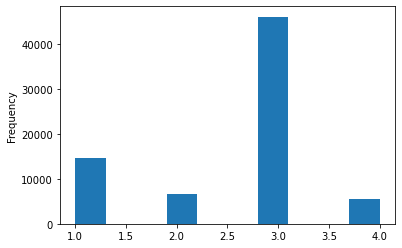

In [102]:
df['Holding_Policy_Type'].plot.hist()

<AxesSubplot:xlabel='Holding_Policy_Duration', ylabel='count'>

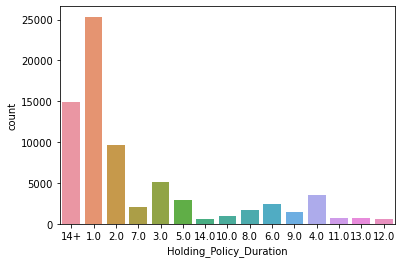

In [104]:
sns.countplot(x = df['Holding_Policy_Duration'])

<AxesSubplot:xlabel='Holding_Policy_Duration', ylabel='count'>

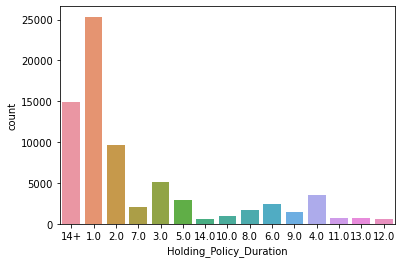

In [103]:
sns.countplot(x =df['Holding_Policy_Duration'])

In [105]:
df.isna().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator               0
Holding_Policy_Duration        0
Holding_Policy_Type            0
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                   21805
Source                         0
Age                            0
dtype: int64

In [110]:
#Changing object into float category
df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].replace('14+','15').astype(float)

In [217]:
df_final = df.drop(['ID','City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator','Lower_Age','Age'], axis =1)

In [218]:
city = pd.get_dummies(df['City_Code'], drop_first=True, prefix = 'City')

accd = pd.get_dummies(df['Accomodation_Type'], drop_first=True, prefix = 'accd')

insure_type = pd.get_dummies(df['Reco_Insurance_Type'], drop_first=True, prefix = 'insure')

mar = pd.get_dummies(df['Is_Spouse'], drop_first=True, prefix = 'mar')

indi = pd.get_dummies(df['Health Indicator'], drop_first=True, prefix = 'indi')

In [219]:
final_data = pd.concat([city, accd, insure_type, mar, indi, df_final], axis = 1)

In [220]:
final_data

,City_C10,City_C11,City_C12,City_C13,City_C14,City_C15,City_C16,City_C17,City_C18,City_C19,City_C2,City_C20,City_C21,City_C22,City_C23,City_C24,City_C25,City_C26,City_C27,City_C28,City_C29,City_C3,City_C30,City_C31,City_C32,City_C33,City_C34,City_C35,City_C36,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9,accd_Rented,insure_Joint,mar_Yes,indi_X2,indi_X3,indi_X4,indi_X5,indi_X6,indi_X7,indi_X8,indi_X9,Region_Code,Upper_Age,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Source
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3213,36,15.0,3.0,22,11628.0,0.0,train
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1117,75,1.0,3.0,22,30510.0,0.0,train
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3732,32,1.0,1.0,19,7450.0,1.0,train
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4378,52,15.0,3.0,19,17780.0,0.0,train
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,2190,44,2.0,3.0,16,10404.0,0.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1044,45,4.0,1.0,18,15884.0,NaN,test
21801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,266,59,6.0,3.0,18,21390.0,NaN,test
21802,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2470,74,1.0,3.0,1,17836.0,NaN,test
21803,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1676,25,3.0,1.0,19,11568.0,NaN,test


In [221]:
train_data = final_data[final_data['Source']=='train']
test_data = final_data[final_data['Source'] == 'test']

In [222]:
X = train_data.drop(['Response', 'Source'], axis =1)
y = train_data['Response']
y = y.astype(int)

### Spliting

In [223]:
from sklearn.model_selection import train_test_split

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123, test_size = 0.3)

### Modelling

In [225]:
from sklearn.linear_model import LogisticRegression

In [226]:
lg = LogisticRegression()

lg.fit(X_train,y_train)

LogisticRegression()

In [227]:
train_pred = lg.predict(X_train)

test_pred = lg.predict(X_test)

In [229]:
confusion_matrix(y_train, train_pred)

array([[27035,     0],
       [ 8582,     0]])

In [231]:
accuracy_score(y_train, train_pred)

0.7590476457871241

#### Naive Bayes

In [147]:
from sklearn.naive_bayes import GaussianNB

In [178]:
gb = GaussianNB()

In [179]:
gb.fit(X_train, y_train)

GaussianNB()

In [180]:
train_pred_gb = gb.predict(X_train)

test_pred_gb = gb.predict(X_test)

In [181]:
confusion_matrix(y_train, train_pred_gb)

array([[23419,  3616],
       [ 7232,  1350]])

In [182]:
confusion_matrix(y_test, test_pred_gb)

array([[10099,  1539],
       [ 3079,   548]])

In [191]:
accuracy_score(y_train, train_pred_gb)

0.6954263413538478